## Exploratory Data Analysis

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from string import punctuation
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
df = pd.read_csv('train.csv', delimiter = ',', encoding = 'ISO-8859-1')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df.shape

(27481, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
df.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [ ]:
df.dropna(subset=['text'], inplace=True)

In [ ]:
# create new dataframe which selected columns
selected_columns = ['selected_text', 'sentiment']
new_df = df[selected_columns]
new_df.head(10)

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,fun,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Wow... u just became cooler.,positive


In [ ]:
df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

<AxesSubplot: xlabel='sentiment', ylabel='count'>

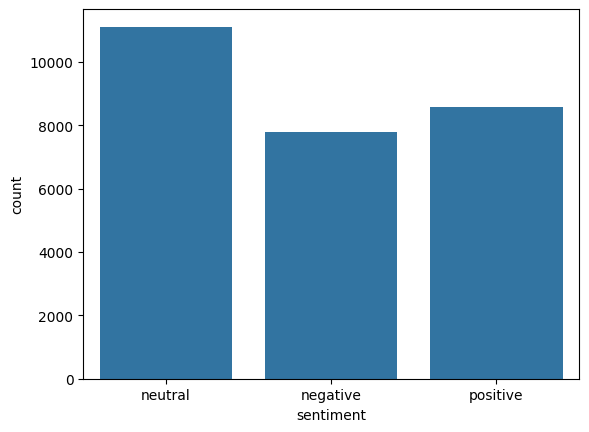

In [ ]:
sns.countplot(x=df['sentiment'])

### Text Preprocessing

#### Basic Text Preprocessing

In [ ]:
# Download necessary resources from NLTK
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

corpus = df['selected_text'].tolist()

final_corpus = []  # Stores lemmatized words for each sentence
final_corpus_joined = []  # Stores lemmatized sentences

# Iterate through each row in the DataFrame
for i in df.index:
    # Convert the text to lowercase
    text = df['selected_text'][i].lower()

    # Tokenize the text into a list of words
    words = word_tokenize(text)

    # Lemmatize each word using WordNetLemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a string
    text = " ".join(words)

    # Append the list of lemmatized words and sentence
    final_corpus.append(words)
    final_corpus_joined.append(text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\60111\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\60111\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data_cleaned = pd.DataFrame()
data_cleaned["selected_text"] = final_corpus_joined
data_cleaned["sentiment"] = df["sentiment"].values
data_cleaned.head()

,selected_text,sentiment
0,"i ` d have responded , if i were going",neutral
1,sooo sad,negative
2,bullying me,negative
3,leave me alone,negative
4,"son of * * * * ,",negative


#### Advanced Text Preprocessing

In [ ]:
nltk.download('stopwords')

# Create a set of stopwords and punctuation to be removed
stuff_to_be_removed = set(stopwords.words('english')) | set(punctuation)
lemmatizer = WordNetLemmatizer()

corpus = df['selected_text'].tolist()

final_corpus2 = []  # Stores lemmatized words for each sentence
final_corpus_joined2 = []  # Stores lemmatized sentences

# Iterate through each row in the DataFrame
for i in df.index:
    # Replace non-alphabetic characters with a space
    text = re.sub('[^a-zA-Z]', ' ', df['selected_text'][i])

    # Convert the text to lowercase
    text = text.lower()

    # Replace HTML or XML tags with a space surrounded by angle brackets
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)

    # Remove digits and non-word characters
    text = re.sub("(\\d|\\W)+", " ", text)

    # Tokenize the text
    words = word_tokenize(text)

    # Lemmatize each word and remove stopwords and punctuation
    words = [lemmatizer.lemmatize(word) for word in words if word not in stuff_to_be_removed]

    # Join the lemmatized words back into a string
    text = " ".join(words)

    # Append the list of lemmatized words and sentence
    final_corpus2.append(words)
    final_corpus_joined2.append(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\60111\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_cleaned2 = pd.DataFrame()
data_cleaned2["selected_text"] = final_corpus_joined2
data_cleaned2["sentiment"] = df["sentiment"].values
data_cleaned2.head()

,selected_text,sentiment
0,responded going,neutral
1,sooo sad,negative
2,bullying,negative
3,leave alone,negative
4,son,negative


### Data Visualization

In [ ]:
from collections import Counter

data_cleaned2['temp_list'] = data_cleaned2['selected_text'].apply(lambda x:str(x).split())

# Count the frequency of each word in the 'selected_text' column
top = Counter([item for sublist in data_cleaned2['temp_list'] for item in sublist])

# Create a DataFrame to store the most common words and their counts
temp = pd.DataFrame(top.most_common(20))

temp.columns = ['Common_words','count']  # Rename the columns

temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,day,1289
1,good,1261
2,love,980
3,happy,856
4,get,830
5,like,797
6,go,751
7,u,690
8,got,660
9,work,659


In [ ]:
positive_sent = data_cleaned2[data_cleaned2['sentiment']=='positive']
negative_sent = data_cleaned2[data_cleaned2['sentiment']=='negative']
neutral_sent = data_cleaned2[data_cleaned2['sentiment']=='neutral']

In [ ]:
positive_sent

,selected_text,sentiment,temp_list
6,fun,positive,[fun]
9,wow u became cooler,positive,"[wow, u, became, cooler]"
11,like,positive,[like]
21,interesting,positive,[interesting]
25,free fillin app ipod fun im addicted,positive,"[free, fillin, app, ipod, fun, im, addicted]"
...,...,...,...
27466,welcome,positive,[welcome]
27473,feel good ab,positive,"[feel, good, ab]"
27474,enjoy,positive,[enjoy]
27477,yay good,positive,"[yay, good]"


### Positive Sentiment

In [ ]:
# most common positive words
top = Counter([item for sublist in positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(50))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,good,831
1,love,749
2,happy,733
3,day,486
4,thanks,445
5,great,363
6,fun,289
7,mother,273
8,nice,267
9,hope,250


In [ ]:
import plotly.express as px

fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

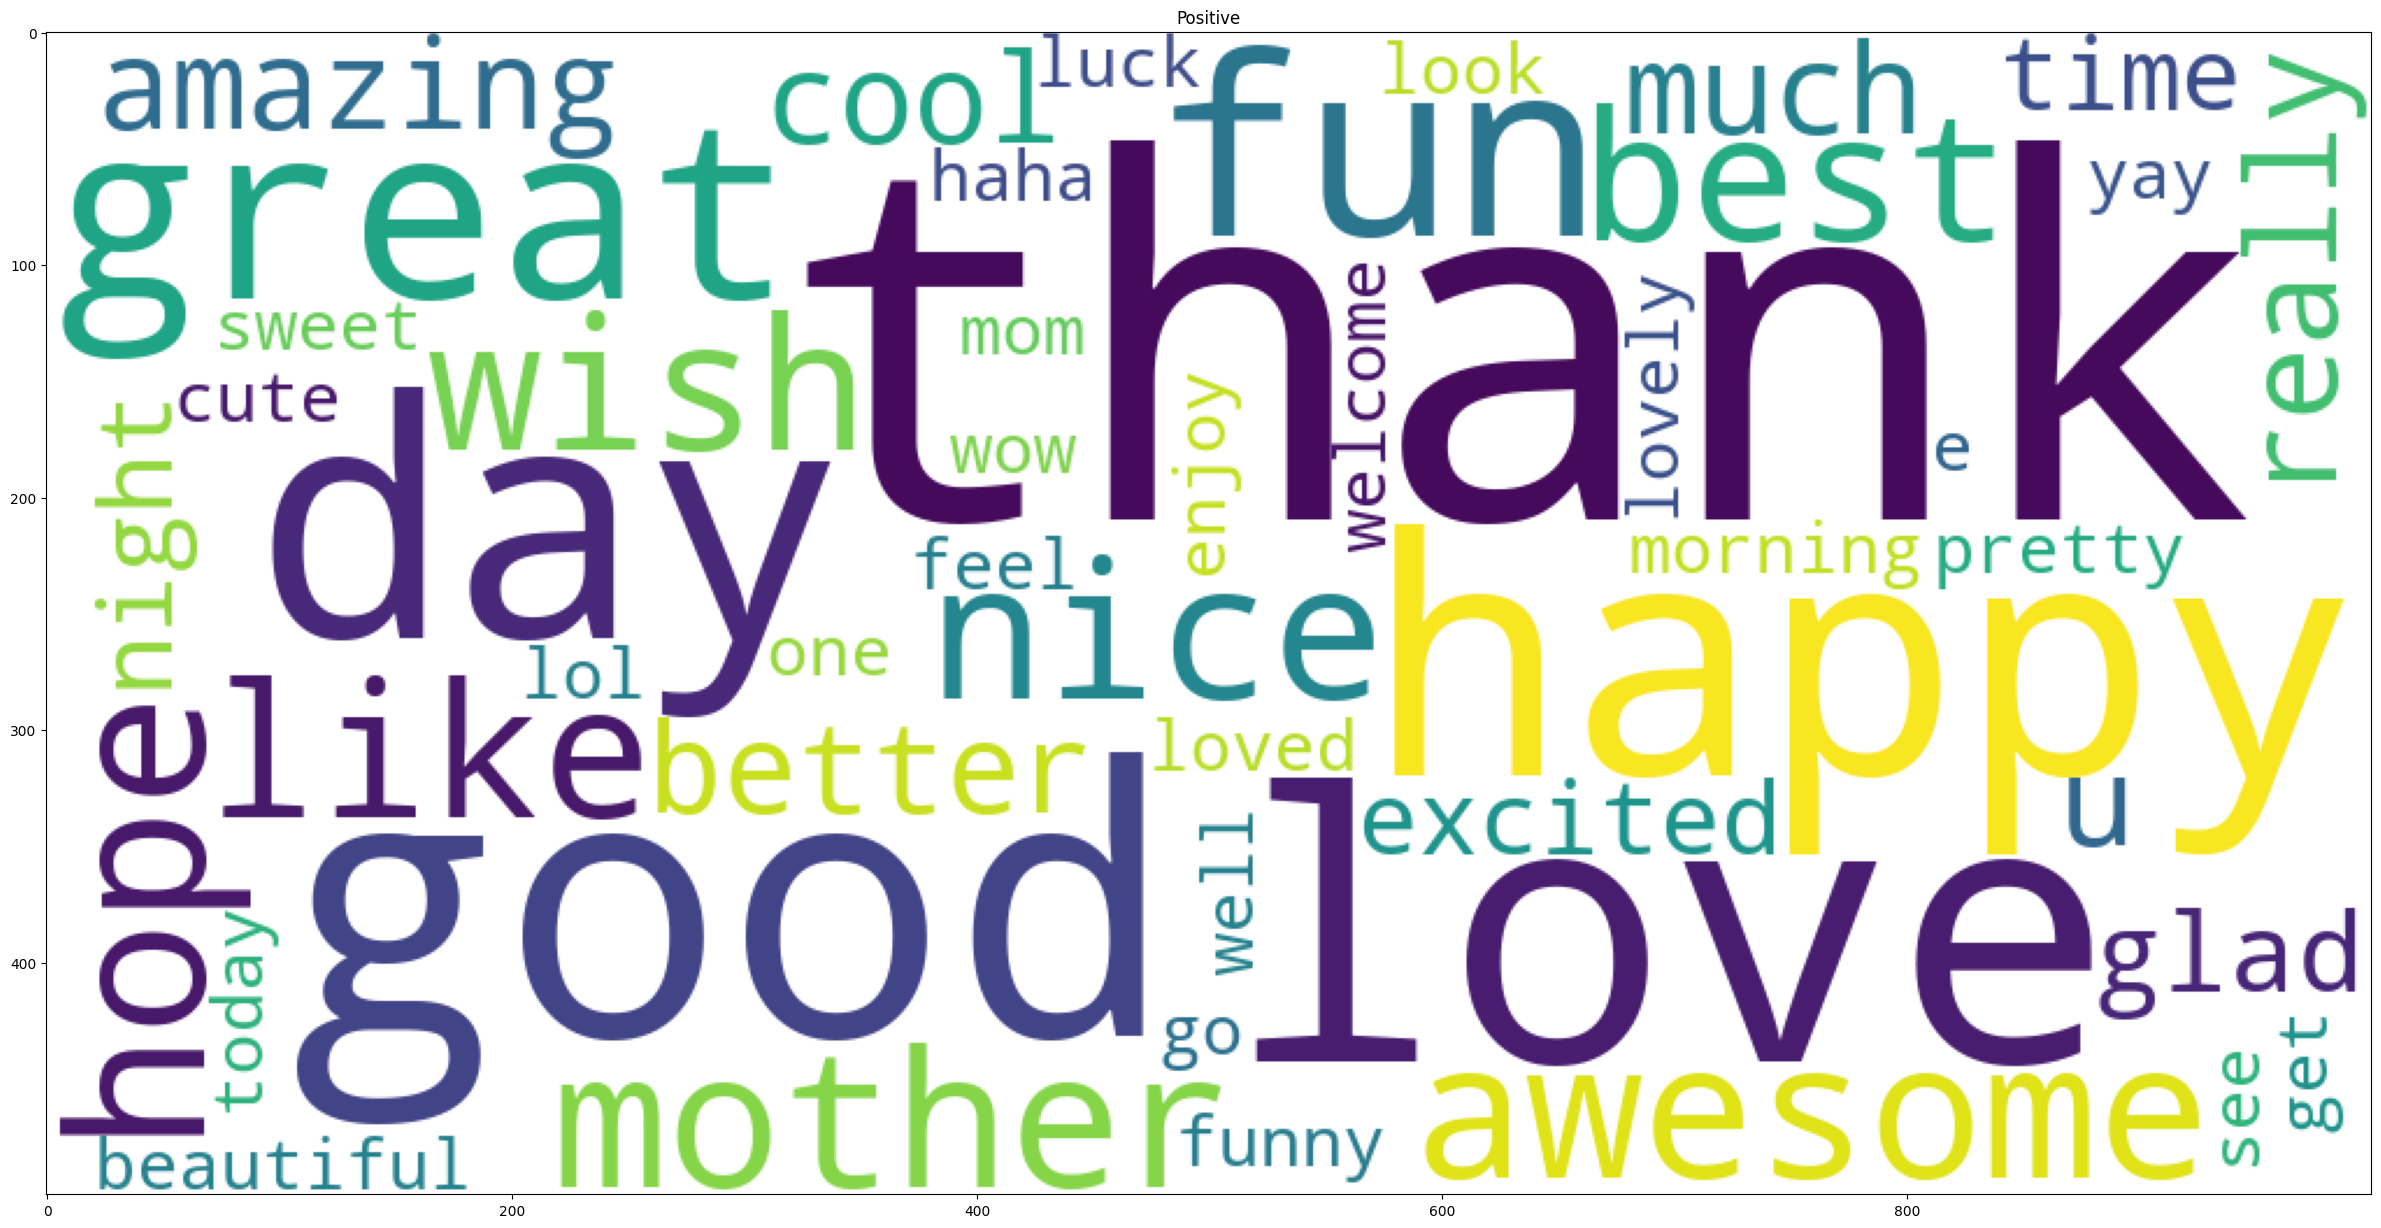

In [ ]:
# Positive
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of words to exclude
exclude_words = ['Common_words', 'object', 'dtype', 'Name']

wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='white',
                      max_words=50,
                      stopwords=exclude_words).generate(str(temp_positive.Common_words))

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

### Negative Sentiment

In [ ]:
# most common negative words
top = Counter([item for sublist in negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(50))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,sad,344
2,sorry,299
3,hate,260
4,bad,247
5,suck,209
6,feel,173
7,sick,167
8,like,164
9,hurt,162
10,tired,146


In [ ]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

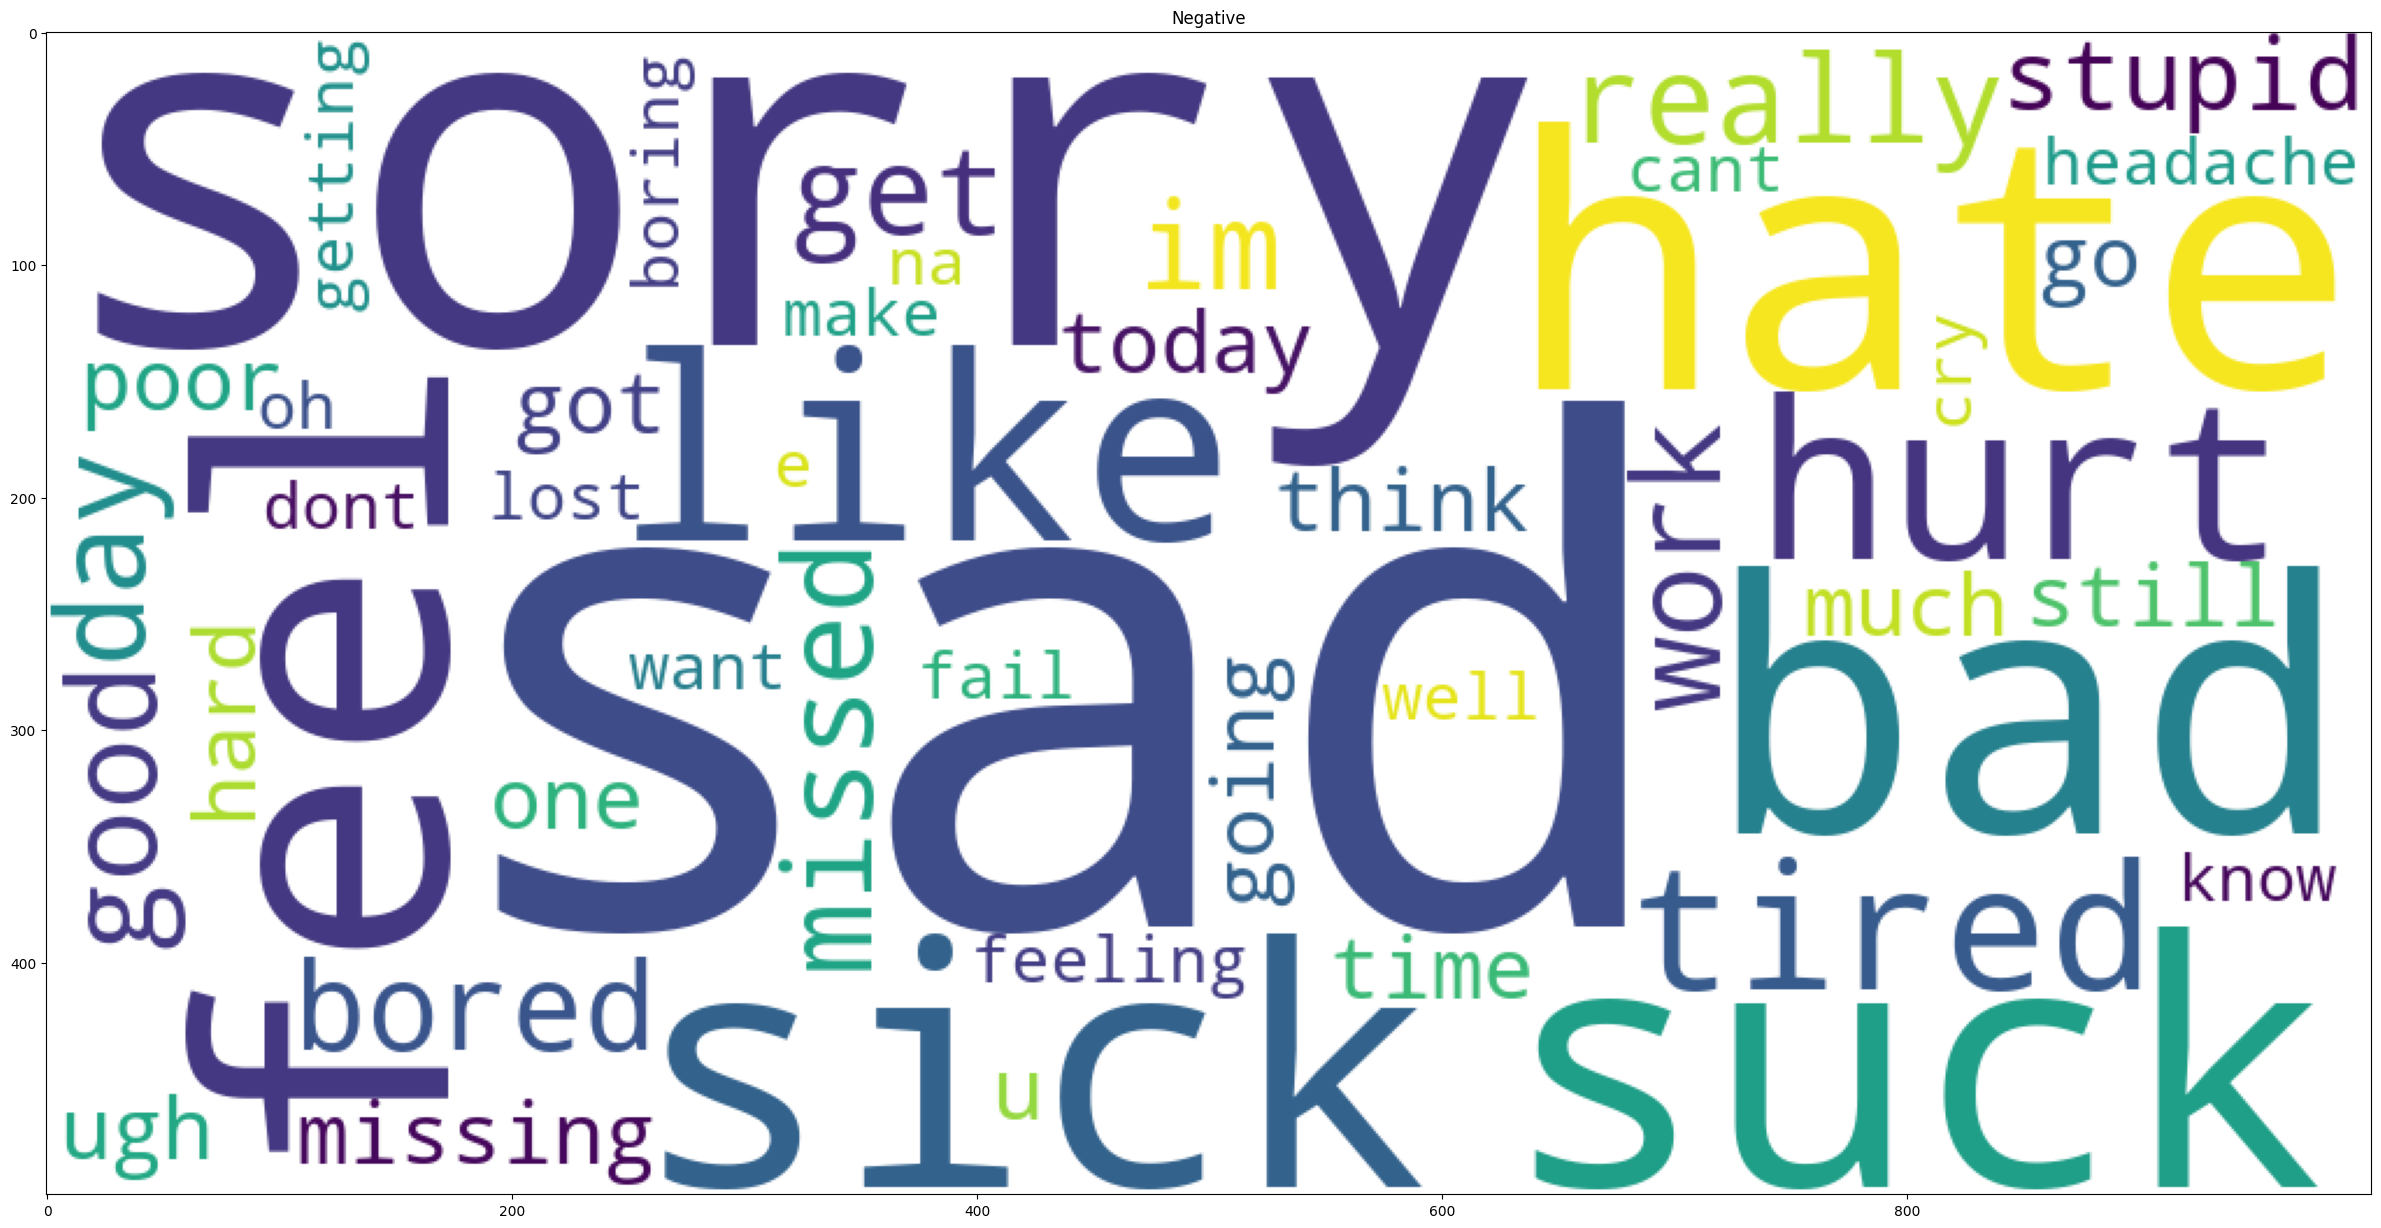

In [ ]:
# Negative
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of words to exclude
exclude_words = ['Common_words', 'object', 'dtype', 'Name']

wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='white',
                      max_words=50,
                      stopwords=exclude_words).generate(str(temp_negative.Common_words))

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Negative")
plt.show()

### Neutral Sentiment

In [ ]:
# most common Neutral words
top = Counter([item for sublist in neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(50))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='YlOrBr')

,Common_words,count
1,get,655
2,go,611
3,got,525
4,work,505
5,u,498
6,going,475
7,lol,468
8,time,461
9,like,453
10,today,442


In [ ]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

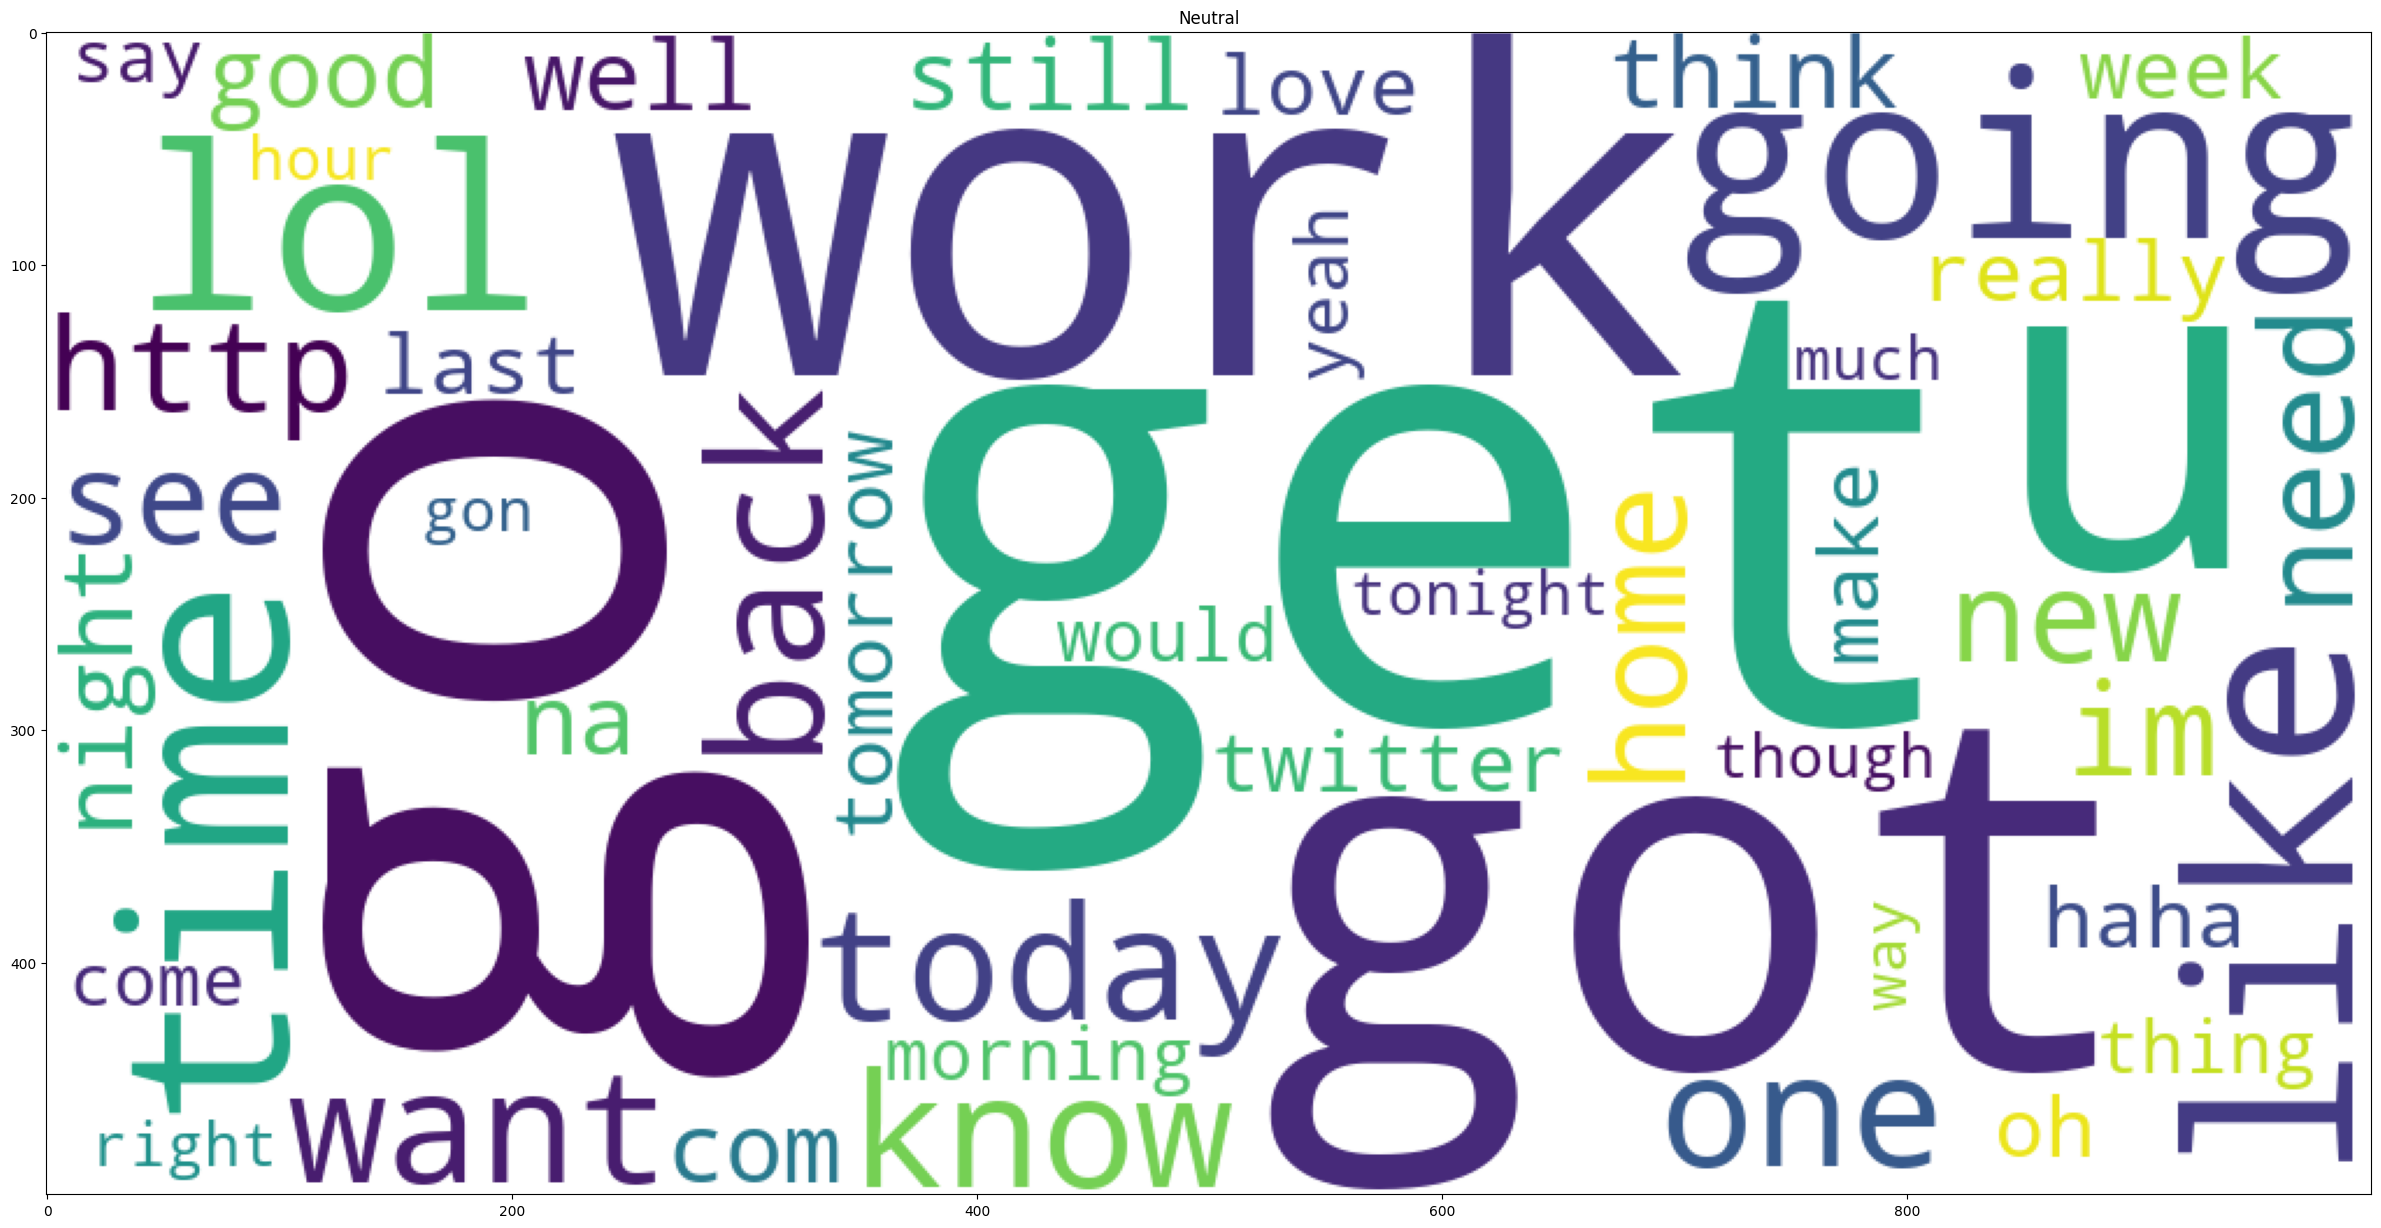

In [ ]:
# Neutral
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of words to exclude
exclude_words = ['Common_words', 'object', 'dtype', 'Name']

wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='white',
                      max_words=50,
                      stopwords=exclude_words).generate(str(temp_neutral.Common_words))

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Neutral")
plt.show()

## Model Building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data_cleaned['selected_text']
y = data_cleaned['sentiment']

# Create an instance of TfidfVectorizer
tfid = TfidfVectorizer()

# Fit and transform the text data to obtain TF-IDF features
Xt = tfid.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state= 42)

In [ ]:
import numpy as np
import pandas as pd



from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import re

In [ ]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data_cleaned['selected_text'].values)
X = tokenizer.texts_to_sequences(data_cleaned['selected_text'].values)
X = pad_sequences(X)

In [ ]:
embed_dim = 110
lstm_out = 128


model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 110)           220000    
                                                                 
 spatial_dropout1d (Spatial  (None, 34, 110)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               122368    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 342755 (1.31 MB)
Trainable params: 342755 (1.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
y = pd.get_dummies(data_cleaned['sentiment']).values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(19236, 34) (19236, 3)
(8244, 34) (8244, 3)


In [ ]:
model.fit(X_train, y_train, epochs = 30, batch_size=60, verbose = 2)

Epoch 1/30
321/321 - 52s - loss: 0.7560 - accuracy: 0.6764 - 52s/epoch - 161ms/step
Epoch 2/30
321/321 - 48s - loss: 0.5363 - accuracy: 0.7902 - 48s/epoch - 149ms/step
Epoch 3/30
321/321 - 46s - loss: 0.4912 - accuracy: 0.8104 - 46s/epoch - 143ms/step
Epoch 4/30
321/321 - 48s - loss: 0.4680 - accuracy: 0.8206 - 48s/epoch - 148ms/step
Epoch 5/30
321/321 - 49s - loss: 0.4507 - accuracy: 0.8282 - 49s/epoch - 153ms/step
Epoch 6/30
321/321 - 46s - loss: 0.4392 - accuracy: 0.8300 - 46s/epoch - 142ms/step
Epoch 7/30
321/321 - 47s - loss: 0.4278 - accuracy: 0.8374 - 47s/epoch - 146ms/step
Epoch 8/30
321/321 - 46s - loss: 0.4233 - accuracy: 0.8382 - 46s/epoch - 142ms/step
Epoch 9/30
321/321 - 45s - loss: 0.4141 - accuracy: 0.8435 - 45s/epoch - 141ms/step
Epoch 10/30
321/321 - 45s - loss: 0.4103 - accuracy: 0.8452 - 45s/epoch - 141ms/step
Epoch 11/30
321/321 - 50s - loss: 0.4032 - accuracy: 0.8470 - 50s/epoch - 157ms/step
Epoch 12/30
321/321 - 44s - loss: 0.3982 - accuracy: 0.8476 - 44s/epoch - 

In [ ]:
validation = 3200

X_validate = X_test[-validation:]
y_validate = y_test[-validation:]
X_test = X_test[:-validation]
y_test = y_test[:-validation]
score,acc = model.evaluate(X_validate, y_validate, verbose = 2, batch_size = 40)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

80/80 - 2s - loss: 0.4075 - accuracy: 0.8506 - 2s/epoch - 28ms/step
score: 0.41
accuracy: 0.85


## Hyperparameters

In [ ]:
for layer in model.layers:
    print(f"Layer Name: {layer.name}")
    print("Layer Config:", layer.get_config())
    print("Layer Weights:", layer.get_weights())
    print()

Layer Name: embedding
Layer Config: {'name': 'embedding', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 34), 'input_dim': 2000, 'output_dim': 110, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': 34}
Layer Weights: [array([[-0.01073315,  0.00117423, -0.01789419, ..., -0.07927091,
         0.06712138,  0.01150756],
       [-0.02388337, -0.01229685, -0.02381128, ..., -0.02514911,
         0.00446254,  0.03132227],
       [ 0.00036974,  0.04535396,  0.06686564, ...,  0.089958  ,
        -0.03410799,  0.31460172],
       ...,
       [ 0.01038134, -0.00142599,  0.04034265, ...,  0.13720903,
        -0.16394182,  0.01242427],
       [ 0.04150604, -0.01889949,  0.01862905, ...,  0.018829  ,
         0.05517296,  0.0865336

In [ ]:
for layer in model.layers:
    for weight in layer.trainable_weights:
        print(f"Layer: {layer.name}, Parameter: {weight.name}, Shape: {weight.shape}")


Layer: embedding, Parameter: embedding/embeddings:0, Shape: (2000, 110)
Layer: lstm, Parameter: lstm/lstm_cell/kernel:0, Shape: (110, 512)
Layer: lstm, Parameter: lstm/lstm_cell/recurrent_kernel:0, Shape: (128, 512)
Layer: lstm, Parameter: lstm/lstm_cell/bias:0, Shape: (512,)
Layer: dense, Parameter: dense/kernel:0, Shape: (128, 3)
Layer: dense, Parameter: dense/bias:0, Shape: (3,)


## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
y_test_labels = y_test.argmax(axis=1)
y_pred_labels = model.predict(X_test).argmax(axis=1)

158/158 [==============================] - 3s 16ms/step


In [ ]:
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy: %.2f" % (accuracy))

Accuracy: 0.84


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
report = classification_report(y_test_labels, y_pred_labels)

In [ ]:
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1450
           1       0.82      0.90      0.86      2058
           2       0.92      0.79      0.85      1536

    accuracy                           0.84      5044
   macro avg       0.85      0.84      0.84      5044
weighted avg       0.85      0.84      0.84      5044



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

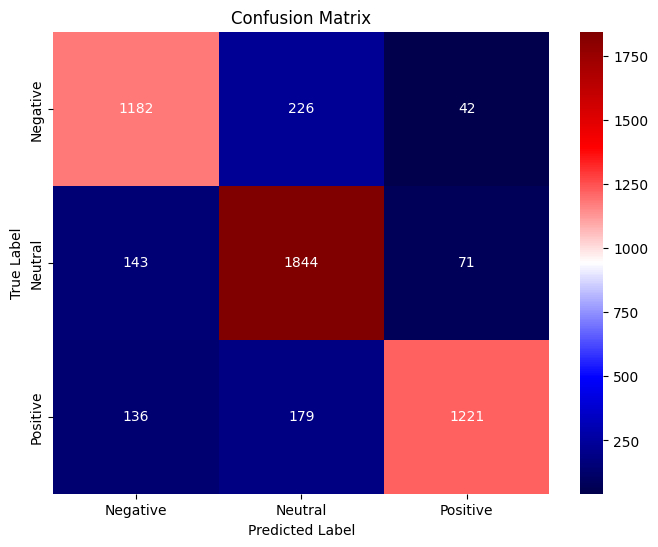

In [ ]:
cm = confusion_matrix(y_test_labels, y_pred_labels)
labels = ['Negative', 'Neutral', 'Positive']

cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='seismic')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()